In [15]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
from datetime import datetime, timedelta

# Set the directory containing the text files
directory = 'output_texts/'

# Initialize a dictionary to hold the texts and their corresponding dates
texts_by_date = defaultdict(list)

# Set the starting date and interval
start_date = datetime(2014, 8, 1)
date_interval = timedelta(days=7)

# Function to generate dates
def generate_date_for_file(index):
    return start_date + index * date_interval

# Loop through the files in the directory
for i, filename in enumerate(sorted(os.listdir(directory))):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            date = generate_date_for_file(i).strftime('%Y-%m-%d')
            texts_by_date[date].append(text)

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub('coalwire', '', text)
    text = re.sub('listupdate', '', text)
    text = re.sub('subscription', '', text)
    text = re.sub('toeditor', '', text)

    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing to each text
preprocessed_texts_by_date = {date: [preprocess(text) for text in texts] for date, texts in texts_by_date.items()}

# Define the keywords or themes to track
themes = {
    'renewable_energy': ['renewable energy', 'solar', 'wind', 'hydropower', 'geothermal', 'biomass', 'photo voltaic', 'pv', 'renewables'],
    'fossil_fuels': ['oil', 'gas', 'fossil fuel', 'refinery', 'petroleum', 'shale', 'tar sands'],
    'coal': ['coal', 'coal-fired', 'coal plant', 'coal mine', 'coal power', 'coal production'],
    'carbon_capture': ['carbon capture', 'ccs', 'carbon sequestration', 'dac', 'direct air capture', 'ccus'],
    'climate_policy': ['climate policy', 'carbon tax', 'emissions trading', 'paris agreement'],
    'hydrogen': ['hydrogen', 'green hydrogen', 'blue hydrogen', 'fuel cell', 'h2'],
    # Add more themes as needed
}

# Function to count theme mentions
def count_theme_mentions(texts, theme_keywords):
    count = 0
    for text in texts:
        for keyword in theme_keywords:
            count += text.count(keyword)
    return count

# Create a DataFrame to hold the counts over time
date_range = sorted(preprocessed_texts_by_date.keys())
theme_counts = {theme: [] for theme in themes}

for date in date_range:
    for theme, keywords in themes.items():
        count = count_theme_mentions(preprocessed_texts_by_date[date], keywords)
        theme_counts[theme].append(count)

# Convert to DataFrame for easier plotting
df_theme_counts = pd.DataFrame(theme_counts, index=pd.to_datetime(date_range))




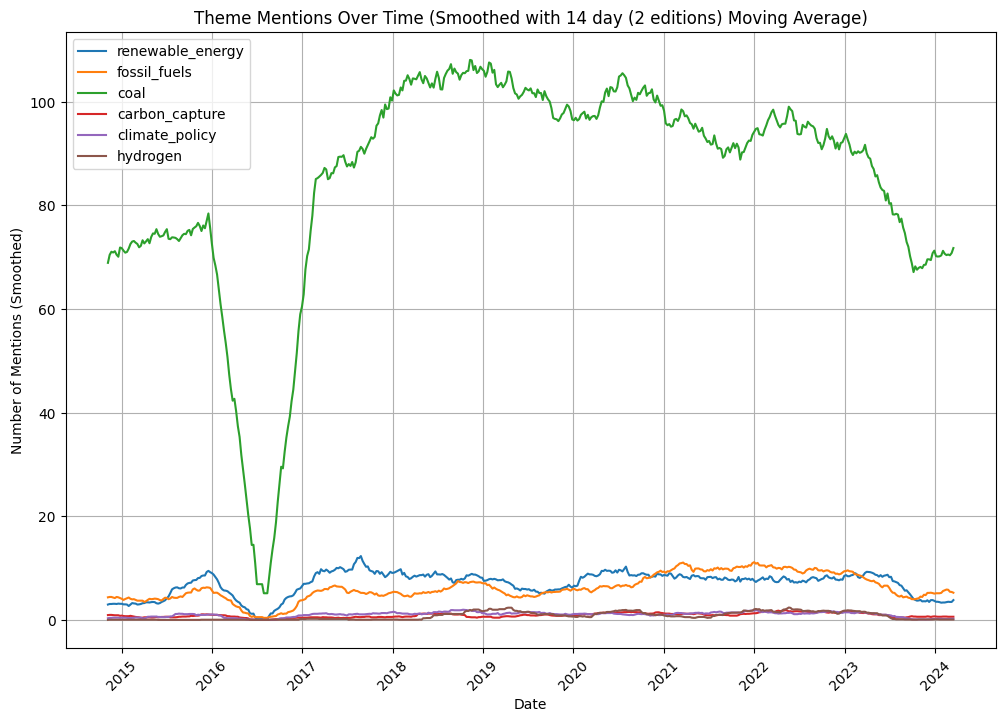

In [16]:
# Convert to DataFrame for easier plotting
df_theme_counts = pd.DataFrame(theme_counts, index=pd.to_datetime(date_range))

# Apply moving average smoothing
window_size = 28  # You can adjust the window size as needed
df_theme_counts_smoothed = df_theme_counts.rolling(window=window_size, center=True).mean()

# Plotting the results with moving average
plt.figure(figsize=(12, 8))
for theme in themes:
    plt.plot(df_theme_counts_smoothed.index, df_theme_counts_smoothed[theme], label=theme)

plt.xlabel('Date')
plt.ylabel('Number of Mentions (Smoothed)')
plt.title('Theme Mentions Over Time (Smoothed with 14 day (2 editions) Moving Average)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [26]:
# Define the keywords or themes to track
# Define coal-specific keywords or themes to track
# Define coal phase-out and just transition themes and keywords to track

coal_themes = {
    'coal_phase_out_policies': [
        'coal phase-out', 'coal ban', 'coal moratorium', 'coal exit', 
        'coal decommissioning', 'coal retirement', 'coal shutdown', 
        'coal policy', 'coal closure', 'coal phase-out agreement'
    ],
    'just_transition': [
        'just transition', 'worker transition', 'community transition', 
        'economic diversification', 'job retraining', 'social equity', 
        'energy transition justice', 'fair transition', 'labor rights', 
        'community resilience'
    ],
    'economic_impacts_of_phase_out': [
        'economic impact of coal phase-out', 'job losses', 'coal-dependent economy', 
        'regional economic decline', 'economic restructuring', 'financial compensation', 
        'coal worker unemployment', 'economic support', 'funding for transition', 
        'economic revitalization'
    ],
    'social_impacts_of_phase_out': [
        'social impact of coal phase-out', 'community displacement', 
        'health impacts of phase-out', 'social justice', 'community support', 
        'coal communities', 'social safety nets', 'coal sector workers', 
        'livelihood impact', 'public health'
    ],
    'alternative_energy_transition': [
        'renewable energy transition', 'green jobs', 'solar power transition', 
        'wind power transition', 'renewable energy investment', 'clean energy jobs', 
        'energy transition strategy', 'renewables deployment', 'grid modernization', 
        'energy infrastructure'
    ],
    'international_phase_out_efforts': [
        'global coal phase-out', 'international coal agreements', 
        'UN climate agreements', 'international climate policy', 
        'Paris Agreement coal', 'global coal reduction', 
        'cross-border coal initiatives', 'international phase-out funding', 
        'global energy transition', 'international just transition'
    ],
    'funding_and_investment': [
        'coal phase-out funding', 'just transition funding', 
        'climate finance', 'investment in energy transition', 
        'green bonds', 'public investment', 'private investment', 
        'coal transition finance', 'financial aid', 'energy transition subsidies'
    ],
    'legal_and_regulatory_frameworks': [
        'coal phase-out regulation', 'legal frameworks for phase-out', 
        'regulatory challenges', 'environmental regulations', 
        'legislation for just transition', 'compliance with coal phase-out', 
        'policy enforcement', 'regulatory oversight', 'climate litigation', 
        'environmental justice'
    ],
    
    # 'coal_mining': [
    #     'coal mine', 'coal mining', 'coal extraction', 'open-pit mining', 
    #     'underground mining', 'coal reserves', 'strip mining', 
    #     'longwall mining', 'coal seam'
    # ],
    # 'coal_power_generation': [
    #     'coal power', 'coal-fired power', 'coal plant', 'coal-fired plant', 
    #     'coal power station', 'thermal power', 'coal electricity', 
    #     'coal combustion', 'coal burning'
    # ],
    # 'coal_export_import': [
    #     'coal export', 'coal import', 'coal trade', 'coal shipping', 
    #     'coal logistics', 'coal transport', 'coal market', 
    #     'coal supply chain', 'coal distribution'
    # ],
    # 'coal_environmental_impact': [
    #     'coal pollution', 'coal emissions', 'coal ash', 'coal waste', 
    #     'air pollution', 'water pollution', 'carbon emissions', 
    #     'acid rain', 'coal dust', 'environmental degradation'
    # ],
    # 'coal_economics': [
    #     'coal prices', 'coal market', 'coal economics', 'coal subsidy', 
    #     'coal demand', 'coal supply', 'coal industry', 
    #     'coal investment', 'coal profitability', 'coal downturn'
    # ],
    # 'coal_policy_regulation': [
    #     'coal regulation', 'coal policy', 'coal phase-out', 
    #     'coal ban', 'coal restriction', 'coal legislation', 
    #     'coal tax', 'coal industry regulation', 'coal moratorium'
    # ],
    # 'coal_technological_advances': [
    #     'clean coal technology', 'coal gasification', 'coal liquefaction', 
    #     'carbon capture for coal', 'advanced coal technology', 
    #     'coal efficiency', 'supercritical coal', 'ultra-supercritical coal'
    # ],
    # 'coal_health_impact': [
    #     'coal health impact', 'black lung disease', 'respiratory issues', 
    #     'coal-related illness', 'community health impact', 
    #     'worker safety', 'coal mining accidents', 'occupational hazards'
    # ],
    # # Add more specific coal-related themes as needed
}


# Create a DataFrame to hold the counts over time
date_range = sorted(preprocessed_texts_by_date.keys())
theme_counts = {theme: [] for theme in coal_themes}

for date in date_range:
    for theme, keywords in coal_themes.items():
        count = count_theme_mentions(preprocessed_texts_by_date[date], keywords)
        theme_counts[theme].append(count)

# Convert to DataFrame for easier plotting
df_theme_counts = pd.DataFrame(theme_counts, index=pd.to_datetime(date_range))


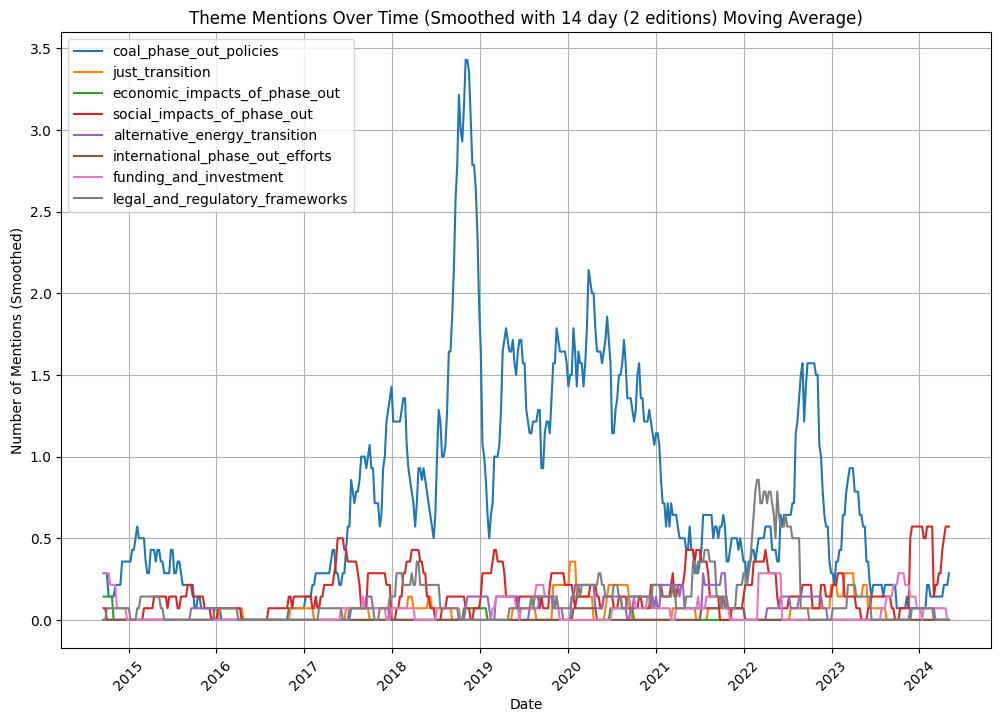

In [27]:
# Convert to DataFrame for easier plotting
df_theme_counts = pd.DataFrame(theme_counts, index=pd.to_datetime(date_range))

# Apply moving average smoothing
window_size = 14  # You can adjust the window size as needed
df_theme_counts_smoothed = df_theme_counts.rolling(window=window_size, center=True).mean()

# Plotting the results with moving average
plt.figure(figsize=(12, 8))
for theme in coal_themes:
    plt.plot(df_theme_counts_smoothed.index, df_theme_counts_smoothed[theme], label=theme)

plt.xlabel('Date')
plt.ylabel('Number of Mentions (Smoothed)')
plt.title('Theme Mentions Over Time (Smoothed with 14 day (2 editions) Moving Average)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
